# Laptop Price Prediction in Naira

### As at January 2024 the rate of Euros to naira on the parallel market is 1,300 naira to 1 euros. So I will be using this as my conversion rate

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
data = pd.read_csv('laptop_price.csv', encoding='latin-1')
data.head()                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [66]:
## convert price_euros to naira and save as price

data['Price'] = data['Price_euros'] * 1300

In [67]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,1741597.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1168622.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,747500.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,3298685.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2344680.0


In [68]:
## drop the Price_euros column

data = data.drop(['Price_euros'], axis=1)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1741597.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1168622.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,747500.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,3298685.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,2344680.0


In [69]:
data.shape

(1303, 13)

In [70]:
data.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [71]:
## check for null value
data.isna().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [72]:
# check duplicate values

data.duplicated().sum()

0

In [73]:
# infor of dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [74]:
## drop laptop ID column
# source : 'https://www.kaggle.com/datasets/muhammetvarl/laptop-price/code'

data = data.drop(['laptop_ID'], axis=1)
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1741597.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1168622.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,747500.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,3298685.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,2344680.0


### Data Preprocessing

#### remove Gb from Ram column and Kg from weight column and convert to integer

In [75]:
data['Ram'] = data['Ram'].str.replace('GB', '')
data['Weight'] = data['Weight'].str.replace('kg', '')

In [76]:
# convert to integer

data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0


In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


In [78]:
## separate categorical column and non catagorical column

cat_variables = data.select_dtypes(include=['object']).columns
num_variables = data.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns

# display the columns

cat_variables, num_variables

(Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory',
        'Gpu', 'OpSys'],
       dtype='object'),
 Index(['Inches', 'Ram', 'Weight', 'Price'], dtype='object'))

### EDA

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


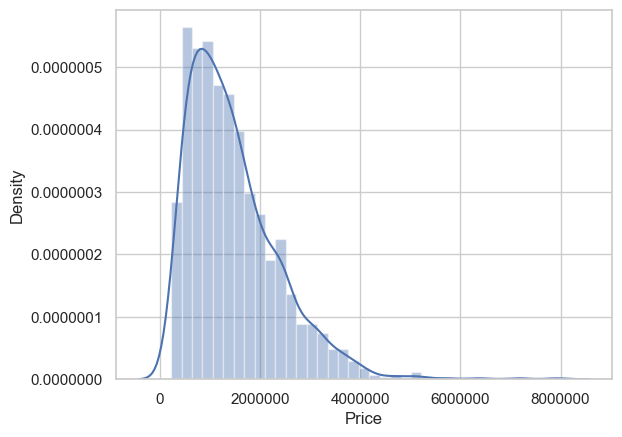

In [81]:
## checkig the distribution of price column
from matplotlib.ticker import ScalarFormatter
sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.distplot(data['Price'], ax=ax)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

#####  This is a bit left skewed

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\si

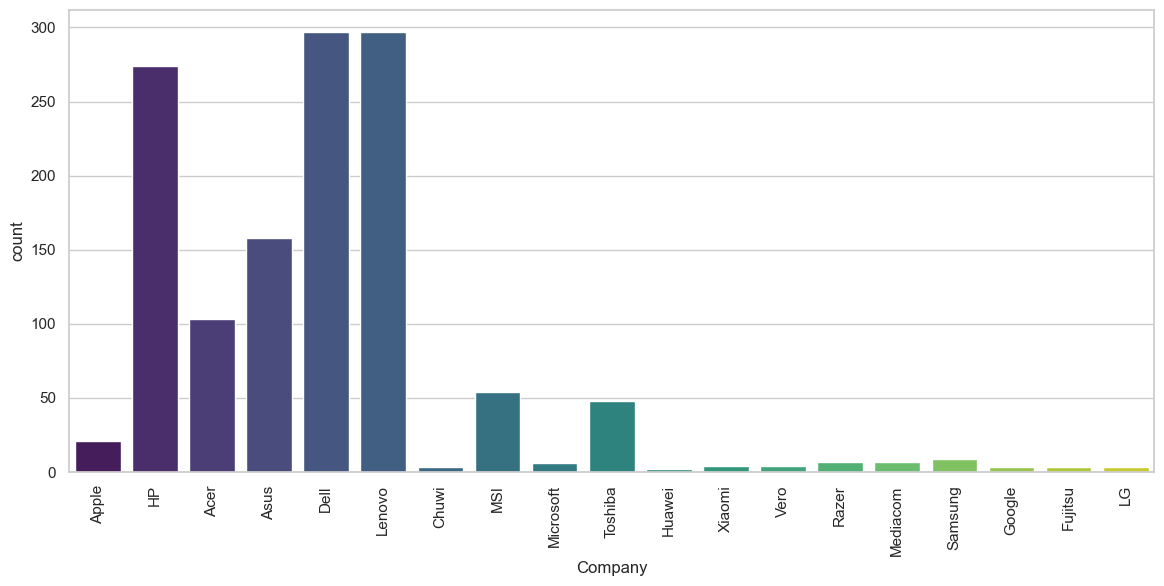

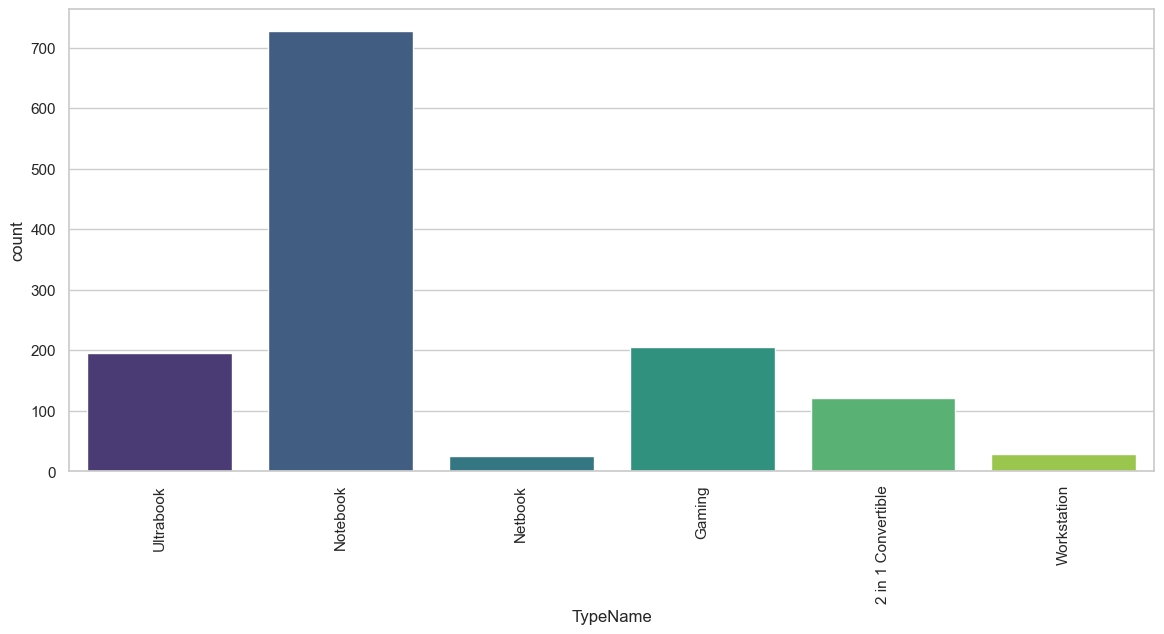

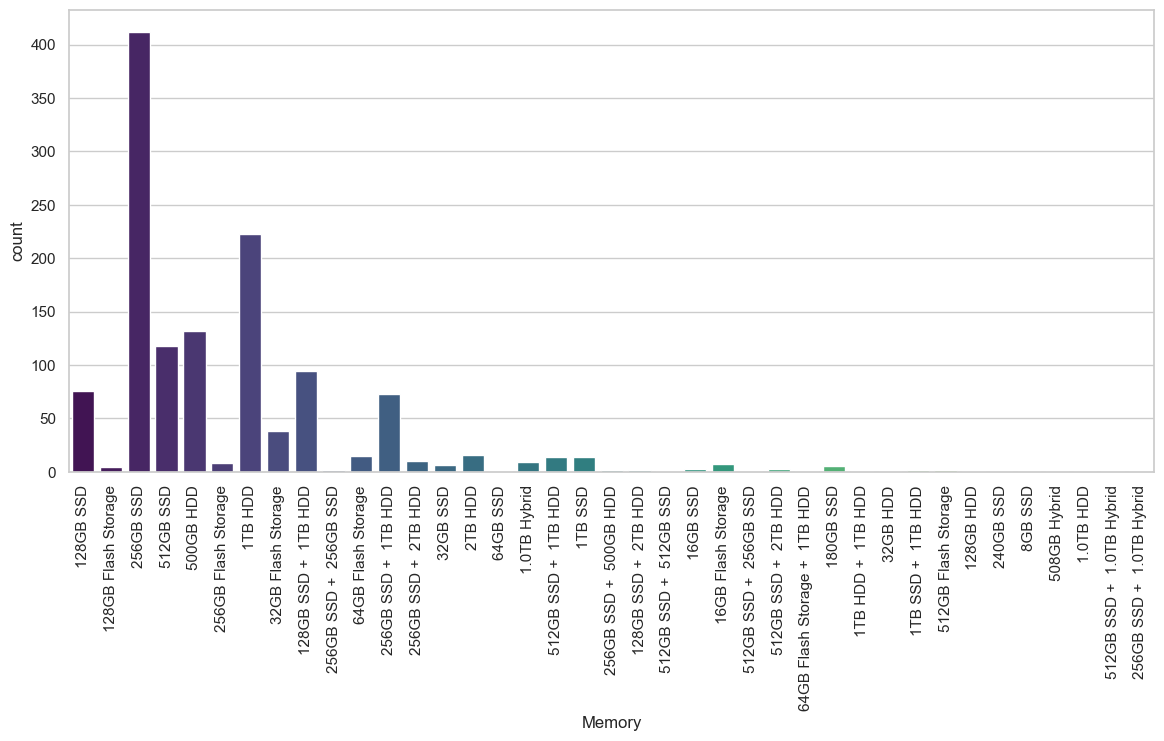

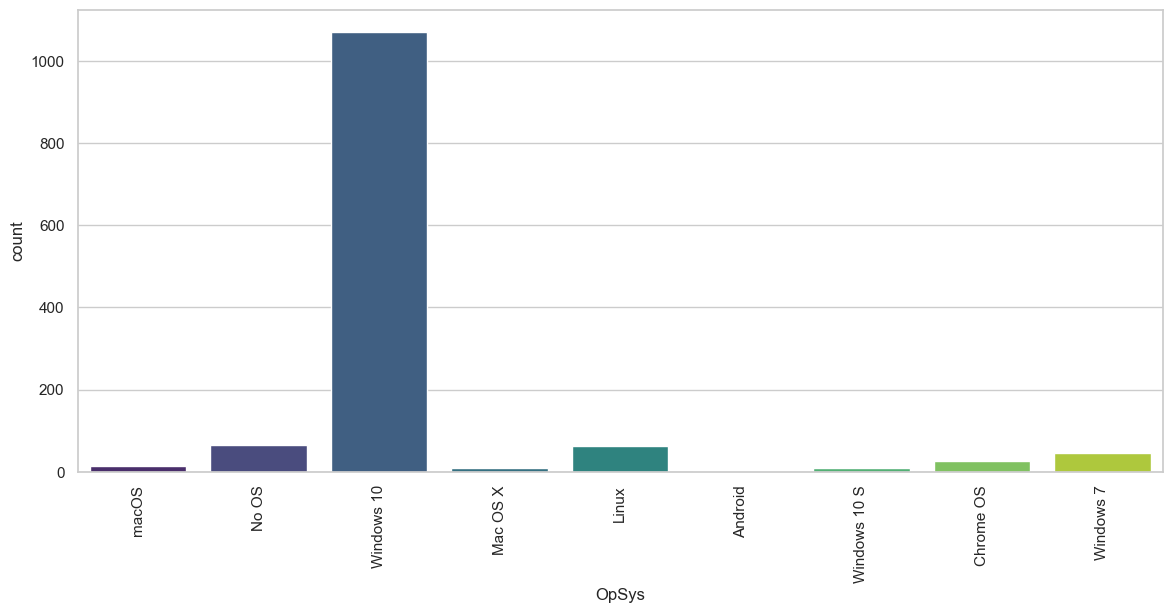

In [82]:
# count plot of categorical variables
# creating a function

def cat_countplot(column_name):
    plt.figure(figsize=(14, 6))
    sns.countplot(data[column_name], palette='viridis')
    plt.xticks(rotation='vertical')
    
col_toplot = cat_variables.drop(['Cpu', 'Gpu', 'ScreenResolution', 'Product'])

for col in col_toplot:
    cat_countplot(col)


<Figure size 1400x600 with 0 Axes>

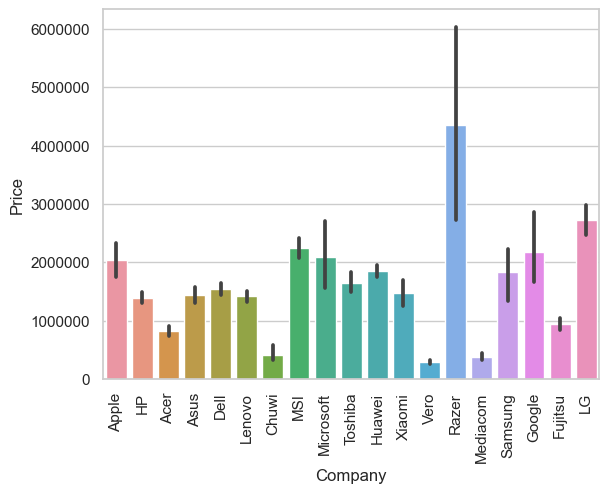

In [85]:
## plotting the average price of laptops for each brands

plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['Company'], y=data['Price'], ax=ax)
plt.xticks(rotation='vertical')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


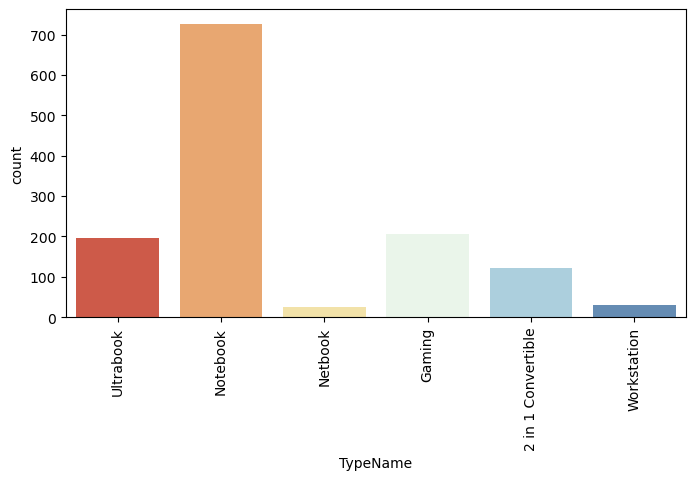

In [62]:
## lets check the various laptops we have

plt.figure(figsize=(8, 4))
sns.countplot(data['TypeName'], palette='RdYlBu')
plt.xticks(rotation='vertical')
plt.show()

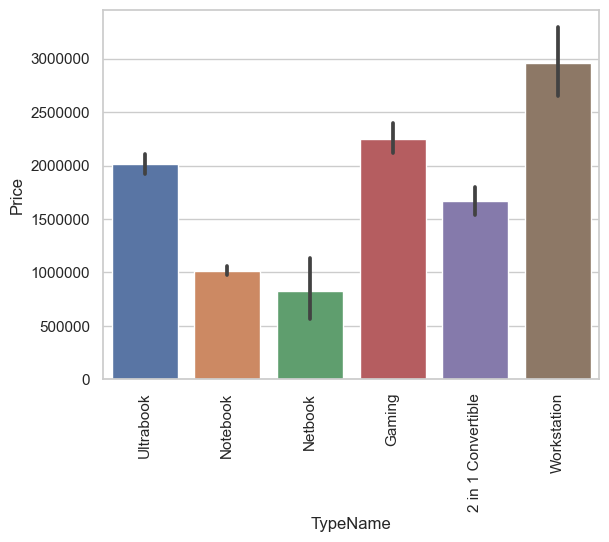

In [86]:
## laptop type and price variation

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['TypeName'], y=data['Price'], ax=ax)
plt.xticks(rotation='vertical')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

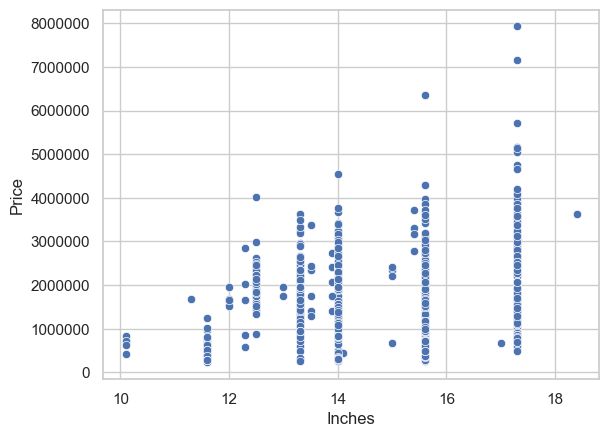

In [91]:
## how related is inches towards price?

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.scatterplot(x= data['Inches'], y= data['Price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

#### Text processing

In [93]:
## lets check value count of screen resolution

data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [95]:
## Touchscreen is an important part of laptop that contributes to price
# lets create a new features that determines if the laptop has a touchscreen or not

data['Touchscreen'] = data['ScreenResolution'].apply(lambda element: 1 if "Touchscreen" in element else 0)

data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Touchscreen', ylabel='count'>

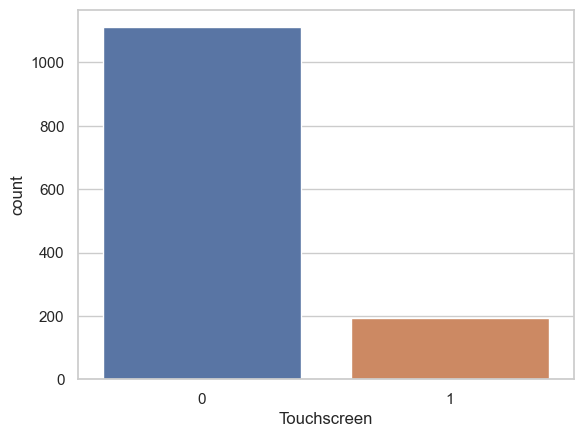

In [96]:
# check countplot of toucscreen
sns.countplot(data['Touchscreen'])

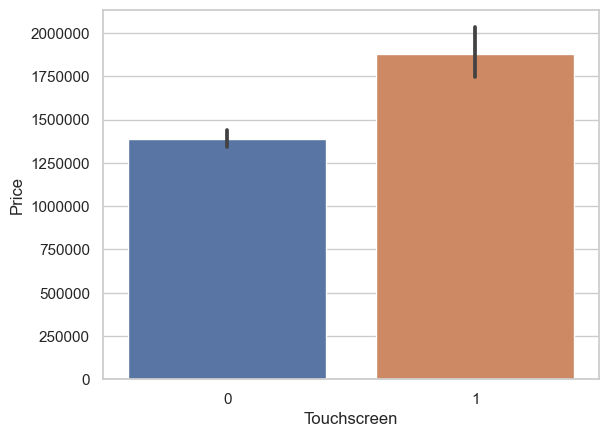

In [98]:
# lets see how touch screen varies with price

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['Touchscreen'], y= data['Price'], ax=ax)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [99]:
## IPS Panel is also an important parameter, lets create a new features for it also

data['IPS'] = data['ScreenResolution'].apply(lambda element: 1 if "IPS" in element else 0)

data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='IPS', ylabel='count'>

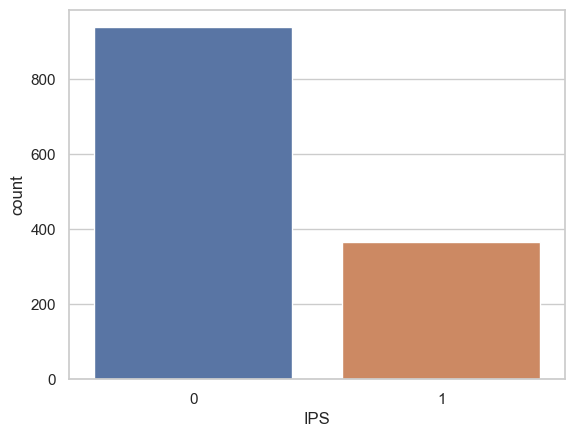

In [101]:
## count plot of IPS

sns.countplot(data['IPS'])

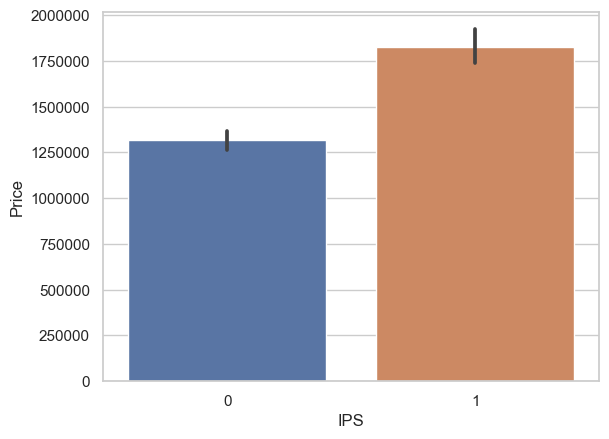

In [102]:
# price varioation of IPS
sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['IPS'], y= data['Price'], ax=ax)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

#### X and Y Screen Resolution extraction

In [103]:
# split on x and extract before as x resoluton and after as y resolution

subdata = data['ScreenResolution'].str.split('x', n =1, expand=True)
subdata.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [107]:
subdata = data['ScreenResolution'].str.split('x', n =1, expand=True)

data['x_res'] = subdata[0]
data['y_res'] = subdata[1]

data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,IPS Panel Retina Display 2560,1600


In [108]:
## to get the exact number we want from x, we use regex expression

data['x_res'] = data['x_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,2560,1600


In [109]:
# convert x_res and y_res to integer

data['x_res'] = data['x_res'].astype('int')
data['y_res'] = data['y_res'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  IPS               1303 non-null   int64  
 14  x_res             1303 non-null   int32  
 15  y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64

<AxesSubplot:>

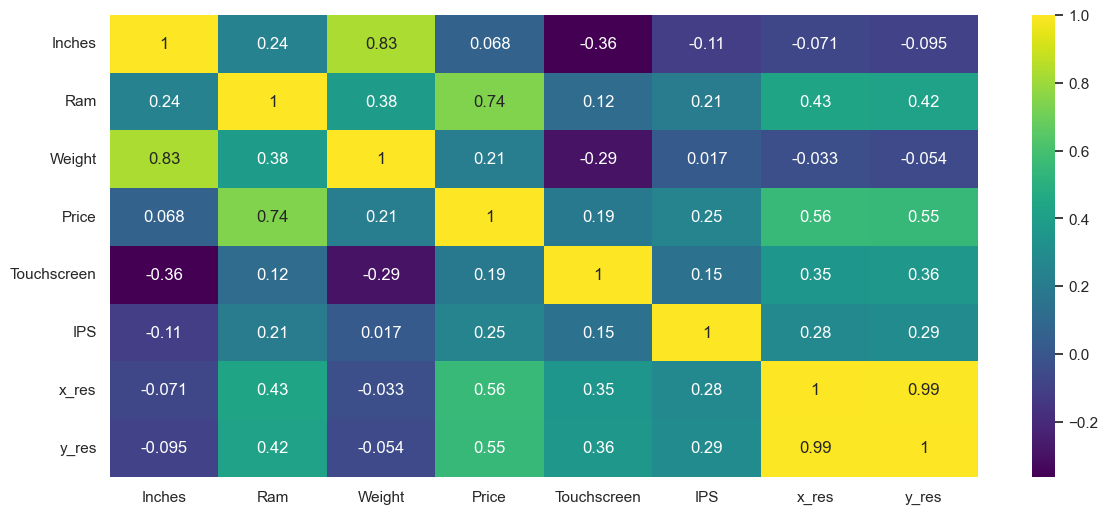

In [110]:
## ploting the correltion of these features

plt.figure(figsize=(14, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [112]:
## correlation of price

data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

##### Ram is a good correlation likewise x and y resolution. But then x and y have high correlation between themselve

##### A good thing will be to combine those two into another feature name PPI (Pixel per Inch)

In [113]:
data['PPI'] = (((data['x_res']**2 + data['y_res']**2)**0.5)/data['Inches']).astype('float')
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res,PPI
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,2560,1600,226.983005
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,1440,900,127.677940
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,1920,1080,141.211998
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,2880,1800,220.534624
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,2560,1600,226.983005


In [114]:
## check correlation with price ahain

data.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

##### PPI has a good correlation with price. safe to say we can drop columns screenresolution, x_res, and y_res

In [116]:
data.drop(columns=['ScreenResolution', 'Inches', 'x_res', 'y_res'], inplace=True)
data.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005


#### CPU processor

In [117]:
data['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

We are going to be using the following grouping for the cpu 

* Intel Core i3
* Intel Core i5
* Intel Core i7
* Intel Other
* AMD
* Other

In [118]:
# extracting the first three words from cpu

data['cpu_name'] = data['Cpu'].apply(lambda x:" ".join(x.split()[:3]))
data.head()

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5


In [121]:
## to have the cpu name as Intel Core i3, i5, i7, Intel others, and AMD processor

def cpuprocessor(cpuname):
    if cpuname =="Intel Core i3" or cpuname == "Intel Core i5" or cpuname == "Intel Core i7":
        return cpuname
    else:
        if cpuname.split()[0] == "Intel":
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
        
## applying the function

data['cpu_name'] = data['cpu_name'].apply(lambda text: cpuprocessor(text))
data.head()
        
    
        

,Company,Product,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name
0,Apple,MacBook Pro,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

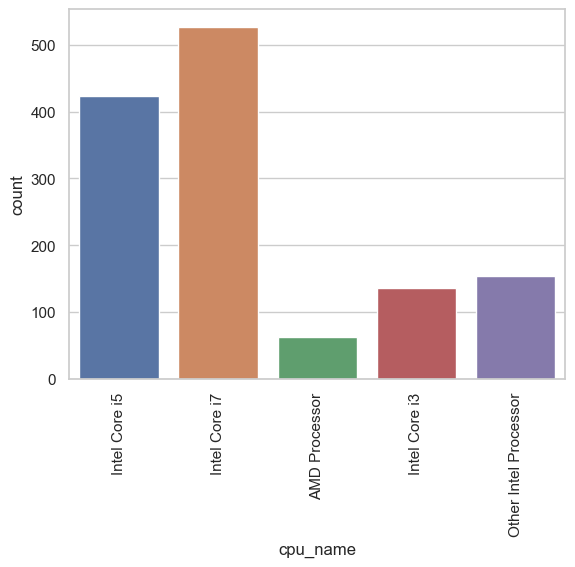

In [122]:
## countplot of cpuname

sns.countplot(data['cpu_name'])
plt.xticks(rotation='vertical')

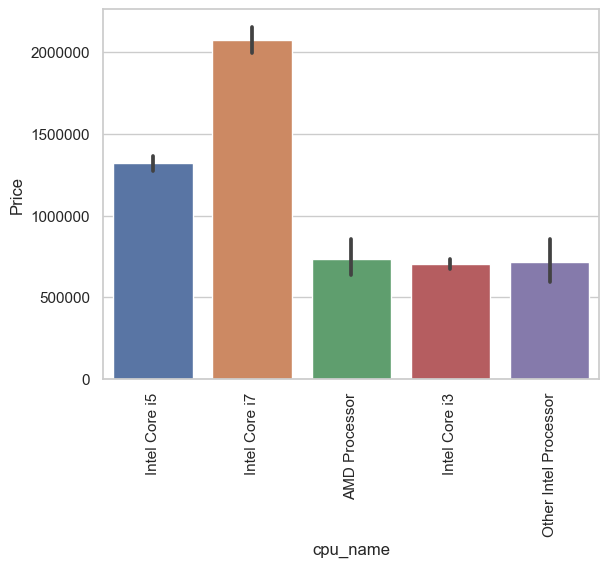

In [125]:
## price variation with processor

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['cpu_name'], y=data['Price'], ax=ax)
plt.xticks(rotation='vertical')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()


In [126]:
## lets drop the cpu column
data.drop(columns=['Cpu'], inplace=True)
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name
0,Apple,MacBook Pro,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5
1,Apple,Macbook Air,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5
2,HP,250 G6,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5
3,Apple,MacBook Pro,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5


##### Ram column processing

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ram', ylabel='count'>

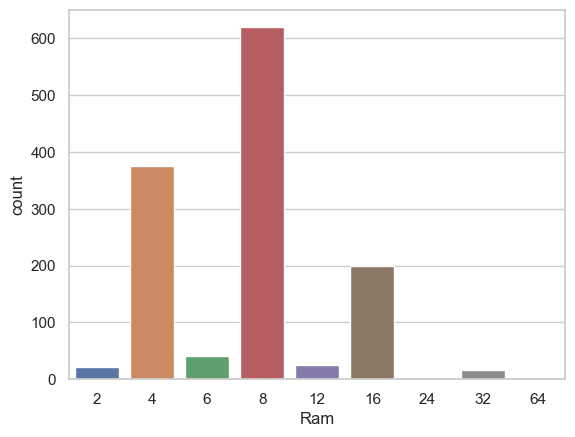

In [127]:
## countplot of ram

sns.countplot(data['Ram'])

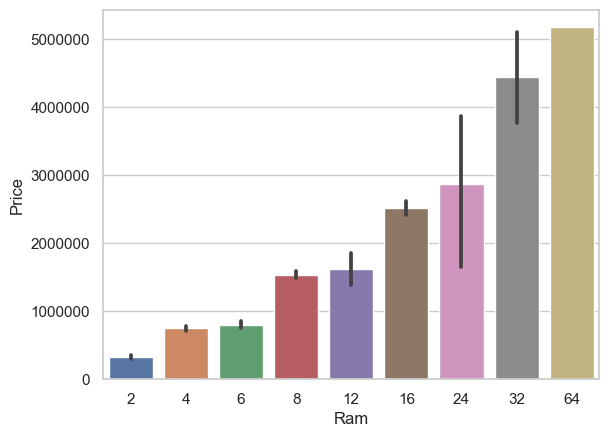

In [128]:
## variation of price with ram

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['Ram'], y= data['Price'], ax=ax)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

##### Memory Column

In [129]:
data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [130]:
## memory colum cleaning

# remove any "." in the text

data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex = True)

## remove GB with blank space

data['Memory'] = data['Memory'].str.replace('GB', '')

# replace TB with 000 to signify 1000 GB
data['Memory'] = data['Memory'].str.replace('TB', '000')

# split the text on + so we can know laptops that have two storage

secstodf = data['Memory'].str.split("+", n=1, expand=True)

secstodf


,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [131]:
# strip of white space and divide secstodf into two

data['firstmem'] = secstodf[0]
data['firstmem'] = data['firstmem'].str.strip()
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,firstmem
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5,256 SSD


In [132]:
# making boolean of the memories and extracting out SSD, HDD, Hybrid, FlashStorage

def applybool(value):
    data['layer1'+value] = data['firstmem'].apply(lambda x: 1 if value in x else 0 )
    
    
listtoapply = ['SSD', 'HDD', 'Hybrid', 'FlashStorage']
for value in listtoapply:
    applybool(value)
    
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,firstmem,layer1SSD,layer1HDD,layer1Hybrid,layer1FlashStorage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5,128 SSD,1,0,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5,256 SSD,1,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7,512 SSD,1,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5,256 SSD,1,0,0,0


In [133]:
## remove all the text from firstmem column leaving only the numbers

data['firstmem'] = data['firstmem'].str.replace('\D', '')
data['firstmem'].value_counts()

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_7388\1633560930.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['firstmem'] = data['firstmem'].str.replace('\D', '')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: firstmem, dtype: int64

In [134]:
## second layer of memory
data['secondmem'] = secstodf[1]
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,firstmem,layer1SSD,layer1HDD,layer1Hybrid,layer1FlashStorage,secondmem
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5,128,1,0,0,0,None
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5,256,1,0,0,0,None
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7,512,1,0,0,0,None
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5,256,1,0,0,0,None


In [135]:
# making boolean of the secondmem and extracting out SSD, HDD, Hybrid, FlashStorage as 0 or 1

def applybool2(value):
    data['layer2'+value] = data['secondmem'].apply(lambda x: 1 if value in x else 0 )
    
    
listtoapply = ['SSD', 'HDD', 'Hybrid', 'FlashStorage']
data['secondmem'] = data['secondmem'].fillna('0')
for value in listtoapply:
    applybool2(value)
    
data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,firstmem,layer1SSD,layer1HDD,layer1Hybrid,layer1FlashStorage,secondmem,layer2SSD,layer2HDD,layer2Hybrid,layer2FlashStorage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,...,128,1,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,...,256,1,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,...,512,1,0,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,...,256,1,0,0,0,0,0,0,0,0


In [136]:
## remove all the text from firstmem column leaving only the numbers

data['secondmem'] = data['secondmem'].str.replace('\D', '')
data['secondmem'].value_counts()

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_7388\1486556662.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['secondmem'] = data['secondmem'].str.replace('\D', '')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: secondmem, dtype: int64

In [137]:
# convert to integers

data['firstmem'] = data['firstmem'].astype('int')
data['secondmem'] = data['secondmem'].astype('int')

data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,firstmem,layer1SSD,layer1HDD,layer1Hybrid,layer1FlashStorage,secondmem,layer2SSD,layer2HDD,layer2Hybrid,layer2FlashStorage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,...,128,1,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,...,256,1,0,0,0,0,0,0,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,...,512,1,0,0,0,0,0,0,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,...,256,1,0,0,0,0,0,0,0,0


In [138]:
## multiplying and getting totals of HDD, SSD, Hybrid, and FlashStorage
data['HDD'] = ((data['firstmem'] * data['layer1HDD']) + (data['secondmem'] * data['layer2HDD']))

data['SSD'] = ((data['firstmem'] * data['layer1SSD']) + (data['secondmem'] * data['layer2SSD']))

data['Hybrid'] = ((data['firstmem'] * data['layer1Hybrid']) + (data['secondmem'] * data['layer2Hybrid']))

data['FlashStorage'] = ((data['firstmem'] * data['layer1FlashStorage']) + (data['secondmem'] * data['layer2FlashStorage']))

data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,...,layer1FlashStorage,secondmem,layer2SSD,layer2HDD,layer2Hybrid,layer2FlashStorage,HDD,SSD,Hybrid,FlashStorage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,...,0,0,0,0,0,0,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,...,0,0,0,0,0,0,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,...,0,0,0,0,0,0,0,256,0,0


In [139]:
## we can now successfully drop unnecessary columns

data.drop(columns=['firstmem', 'secondmem', 'layer1HDD', 'layer1SSD', 'layer1Hybrid', 'layer1FlashStorage',
                   'layer2HDD', 'layer2SSD', 'layer2Hybrid', 'layer2FlashStorage'], inplace=True)

data.head()

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,Hybrid,FlashStorage
0,Apple,MacBook Pro,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Macbook Air,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5,0,0,0,0
2,HP,250 G6,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,MacBook Pro,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,MacBook Pro,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5,0,256,0,0


In [140]:
data.sample(7)

,Company,Product,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,Hybrid,FlashStorage
1080,Lenovo,Yoga 900S-12ISK,Ultrabook,8,512 SSD,Intel HD Graphics 515,Windows 10,0.99,1818700.0,1,1,234.976765,Other Intel Processor,0,512,0,0
698,Toshiba,Portege Z30T-C-133,Ultrabook,16,512 SSD,Intel HD Graphics 520,Windows 10,1.36,2440100.0,1,0,165.632118,Intel Core i7,0,512,0,0
937,MSI,GP62M Leopard,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,1558700.0,0,0,141.211998,Intel Core i7,1000,128,0,0
591,Lenovo,IdeaPad 320-15ABR,Notebook,12,512 SSD,AMD Radeon 530,Windows 10,2.20,1233700.0,0,0,141.211998,AMD Processor,0,512,0,0
498,Lenovo,ThinkPad 13,Notebook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.40,1233700.0,0,1,165.632118,Intel Core i3,0,256,0,0
1065,Dell,XPS 13,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.29,1895400.0,0,0,165.632118,Intel Core i7,0,256,0,0
485,Lenovo,ThinkPad E480,Notebook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.75,1363700.0,0,1,157.350512,Intel Core i5,0,256,0,0


In [141]:
# lets drop memory column

data.drop(columns=['Memory'], inplace=True)
data.sample(4)

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,Hybrid,FlashStorage
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,4,Nvidia GeForce 920M,Windows 10,2.20,936416.0,0,0,100.454670,Intel Core i7,500,0,0,0
713,Asus,VivoBook E403NA,Notebook,4,Intel HD Graphics 500,Windows 10,1.50,387400.0,0,0,157.350512,Other Intel Processor,0,0,0,0
880,HP,EliteBook x360,2 in 1 Convertible,4,Intel HD Graphics 620,Windows 10,1.28,2210000.0,1,0,165.632118,Intel Core i5,0,256,0,0
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,1948700.0,1,1,276.053530,Intel Core i7,0,512,0,0


In [142]:
data.corr()['Price']

Ram             0.743007
Weight          0.210370
Price           1.000000
Touchscreen     0.191226
IPS             0.252208
PPI             0.473487
HDD            -0.096441
SSD             0.670799
Hybrid          0.007989
FlashStorage         NaN
Name: Price, dtype: float64

Hybrid and FlashStorage are insignificant and will be dropped from the model
HDD and SDD have good correlation and will be used in the model

In [143]:
# dropp

data.drop(columns=['Hybrid', 'FlashStorage'], inplace=True)

##### GPU processing

In [144]:
data['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [145]:
## only the gpu brand will be considered

data['gpu_brand'] = data['Gpu'].apply(lambda x:x.split()[0])


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gpu_brand', ylabel='count'>

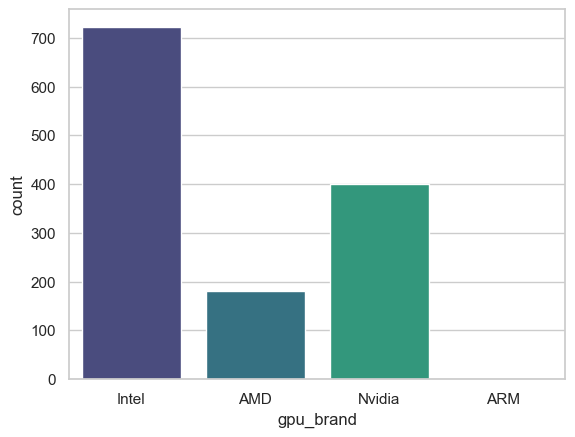

In [146]:
## countplot of gpu brand
sns.countplot(data['gpu_brand'], palette='viridis')

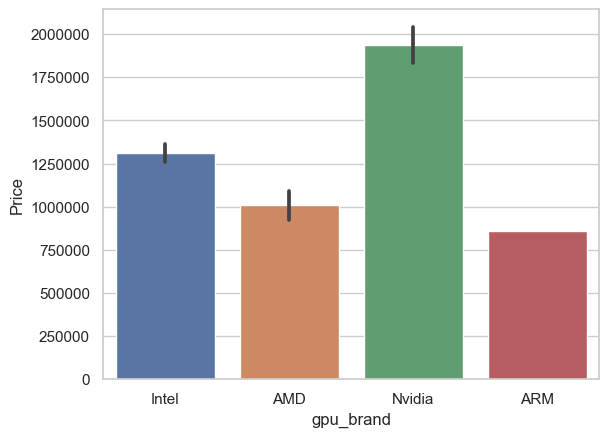

In [148]:
# gpu and price
sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['gpu_brand'], y= data['Price'], estimator=np.mean, ax=ax)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [149]:
## lets drop gpu column

data.drop(columns=['Gpu'])
data.head()

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,gpu_brand
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5,0,256,Intel


##### Operating systems

In [150]:
data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

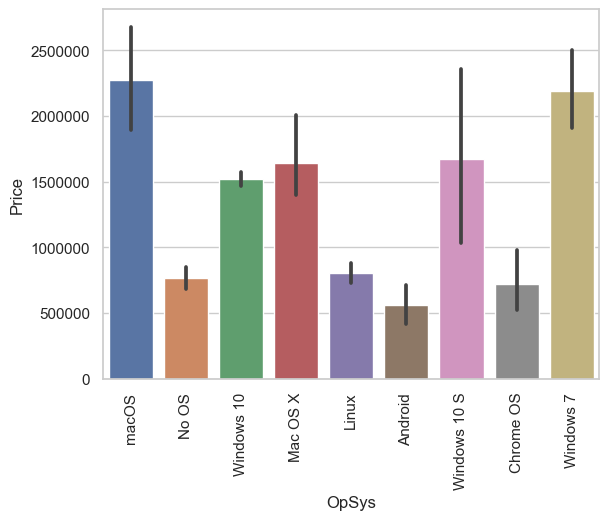

In [152]:
sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['OpSys'], y= data['Price'], ax=ax)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.xticks(rotation='vertical')
plt.show()

In [153]:
## lets get the unique values of operating systems

data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [155]:
# grouping
# Windows 10, Windows 7, Windows 10 S as Windows
# macOS, Mac OS X as Mac
# anything else as others

def setopscategory(text):
    if text == "Windows 10 S" or text == "Windows 7" or text == "Windows 10":
        return "Windows"
    elif text == "Mac OS X" or text == "macOS":
        return "Mac"
    else:
        return "Others"

data['OpSystem'] = data['OpSys'].apply(lambda x: setopscategory(x))

data.head()        

,Company,Product,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,gpu_brand,OpSystem
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,1741597.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,1168622.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,250 G6,Notebook,8,Intel HD Graphics 620,No OS,1.86,747500.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,MacBook Pro,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,3298685.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,2344680.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [156]:
data.drop(columns=['OpSys'], inplace=True)

In [157]:
data.sample(4)

,Company,Product,TypeName,Ram,Gpu,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,gpu_brand,OpSystem
253,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,8,Intel UHD Graphics 620,1.37,2403700.0,1,1,158.482530,Intel Core i7,0,512,Intel,Windows
838,Lenovo,N42-20 Chromebook,Notebook,4,Intel HD Graphics 400,1.50,422500.0,0,0,111.935204,Other Intel Processor,0,0,Intel,Others
382,Asus,ROG Strix,Gaming,8,Nvidia GeForce GTX 1060,2.30,2151500.0,0,1,141.211998,Intel Core i7,1000,128,Nvidia,Windows
297,Dell,Precision 7720,Workstation,16,Nvidia Quadro M1200,3.42,3750318.0,0,0,127.335675,Intel Core i7,0,256,Nvidia,Windows


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OpSystem', ylabel='count'>

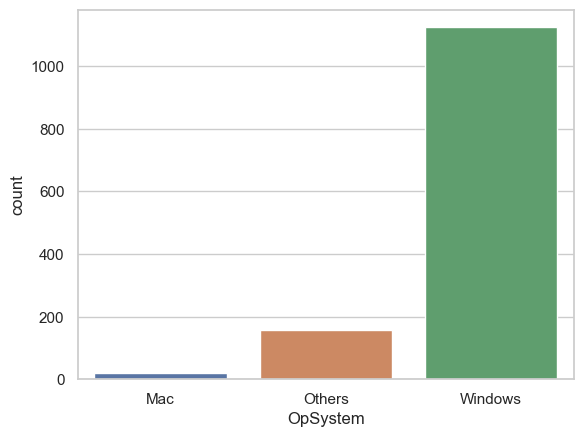

In [158]:
sns.countplot(data['OpSystem'])

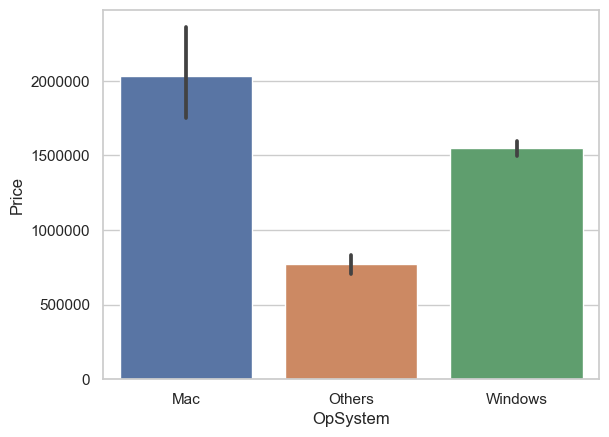

In [159]:
## price variation with operating system

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.barplot(x=data['OpSystem'], y= data['Price'], ax=ax)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [173]:
data.drop(columns=['Gpu', 'Product'], inplace=True)
data.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,gpu_brand,OpSystem
0,Apple,Ultrabook,8,1.37,1741597.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,1168622.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,747500.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,3298685.0,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,2344680.0,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


##### Weight

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

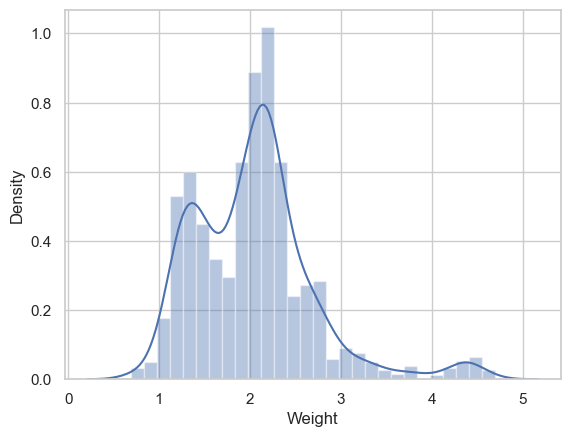

In [174]:
sns.distplot(data['Weight'])

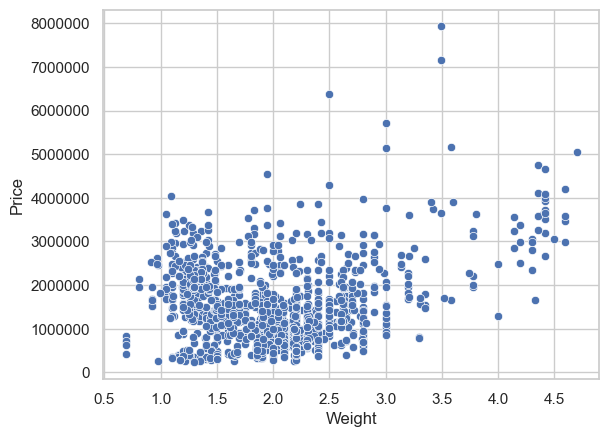

In [175]:
## price and weight

sns.set(style='whitegrid')
fig, ax = plt.subplots()
sns.scatterplot(x=data['Weight'], y=data['Price'], ax=ax)
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

##### Price

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

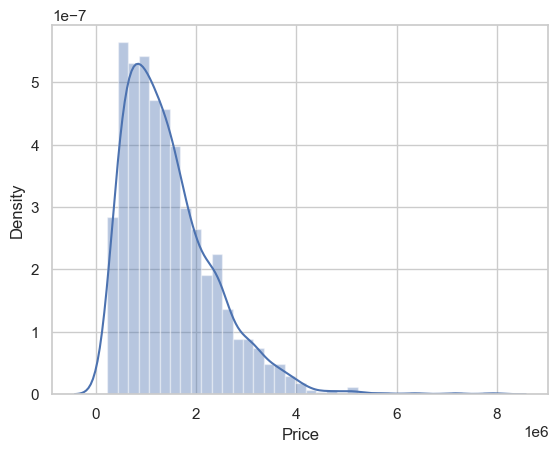

In [176]:
sns.distplot(data['Price'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

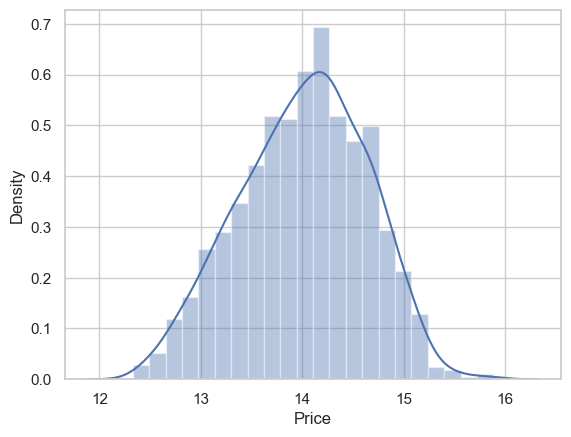

In [166]:
## log distribution of price give a gaussian distribution

sns.distplot(np.log(data['Price']))

In [177]:
data.corr()['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
PPI            0.473487
HDD           -0.096441
SSD            0.670799
Name: Price, dtype: float64

<AxesSubplot:>

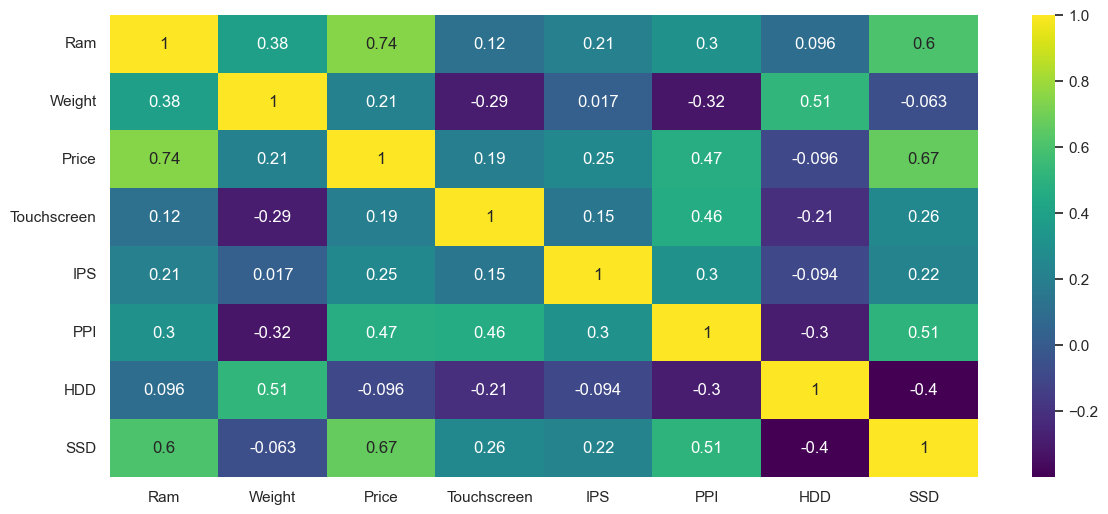

In [178]:
# coreelation map

plt.figure(figsize=(14, 6))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

## Model Building

We are converting the price to logarithm to get a normal gaussian distribution

In [179]:
test_df = np.log(data['Price'])
train_df = data.drop(['Price'], axis=1)

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [181]:
x_train, x_test, y_train, y_test = train_test_split(train_df, test_df,
                                                    test_size=0.15,random_state=2)

x_train.shape, x_test.shape

((1107, 12), (196, 12))

Column Transformer is used for building models using pipelines


In [182]:
## first we get our index
mapper = {i:value for i, value in enumerate(x_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'Weight',
 4: 'Touchscreen',
 5: 'IPS',
 6: 'PPI',
 7: 'cpu_name',
 8: 'HDD',
 9: 'SSD',
 10: 'gpu_brand',
 11: 'OpSystem'}

#### Linear regression

In [183]:
data.head(3)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,gpu_brand,OpSystem
0,Apple,Ultrabook,8,1.37,1741597.0,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,1168622.0,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,747500.0,0,0,141.211998,Intel Core i5,0,256,Intel,Others


In [184]:
# we apply one-hot encoding to the categorical variables (Company i=0), 
# TypeName i=1, cpu_name i=7, gpu_brand i=10, OpSystem i=11
# The other numerical variables goes through

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 Score 0.8244080785411183
MAE 0.20979730698403273


In [185]:
## this means our models is giving accuracy of 82.4% and error of 20.9 %%!

# to check for the margin of error for each predicted value

np.exp(0.20979730698403273)

1.2334280273708236

#### Ridge Regression

In [186]:
# we apply one-hot encoding to the categorical variables (Company i=0), 
# TypeName i=1, cpu_name i=7, gpu_brand i=10, OpSystem i=11
# The other numerical variables goes through

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 Score 0.8226461848784252
MAE 0.2101069141439294


#### Lasso Regression

In [187]:
# we apply one-hot encoding to the categorical variables (Company i=0), 
# TypeName i=1, cpu_name i=7, gpu_brand i=10, OpSystem i=11
# The other numerical variables goes through

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 Score 0.823513837964237
MAE 0.21089837837677708


#### Decision Tree

In [188]:
# we apply one-hot encoding to the categorical variables (Company i=0), 
# TypeName i=1, cpu_name i=7, gpu_brand i=10, OpSystem i=11
# The other numerical variables goes through

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 Score 0.8351183461239471
MAE 0.19192565225179797


#### Random Forest

In [189]:
# we apply one-hot encoding to the categorical variables (Company i=0), 
# TypeName i=1, cpu_name i=7, gpu_brand i=10, OpSystem i=11
# The other numerical variables goes through

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0,1,7,10,11])
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                              )

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 Score', metrics.r2_score(y_test, y_pred))
print('MAE', metrics.mean_absolute_error(y_test, y_pred))

R2 Score 0.8863549388986873
MAE 0.1587282512656297


In [190]:
## storing random forest algorithm
import pickle

pickle.dump(data, open('data.pkl', 'wb'))
pickle.dump(pipe, open('pipe.pkl', 'wb'))

In [191]:
train_df.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,gpu_brand,OpSystem
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [192]:
train_df.to_csv('traineddata.csv', index=None)

#### Hyperparameter tunning for Random Forest

In [193]:
indexlist = [0,1,7,10,11]
transformlist = []
for key, value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'cpu_name', 'gpu_brand', 'OpSystem']

In [194]:
## applying get dummy function

train_df = pd.get_dummies(train_df, columns=transformlist, drop_first=True)
train_df.head()

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Workstation,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other Intel Processor,gpu_brand_ARM,gpu_brand_Intel,gpu_brand_Nvidia,OpSystem_Others,OpSystem_Windows
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [195]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(train_df, test_df,
                                                    test_size=0.15, random_state=2)

x_train.shape, x_test.shape

((1107, 39), (196, 39))

[Text(0.4978122304497497, 0.9814814814814815, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1107\nvalue = 14.015'),
 Text(0.22670044726146055, 0.9444444444444444, 'cpu_name_Other Intel Processor <= 0.5\nsquared_error = 0.191\nsamples = 370\nvalue = 13.409'),
 Text(0.1408082356076759, 0.9074074074074074, 'cpu_name_Intel Core i5 <= 0.5\nsquared_error = 0.127\nsamples = 259\nvalue = 13.587'),
 Text(0.10031316631130063, 0.8703703703703703, 'cpu_name_Intel Core i7 <= 0.5\nsquared_error = 0.08\nsamples = 154\nvalue = 13.437'),
 Text(0.05670309168443497, 0.8333333333333334, 'PPI <= 114.881\nsquared_error = 0.065\nsamples = 131\nvalue = 13.375'),
 Text(0.023295908848614072, 0.7962962962962963, 'cpu_name_Intel Core i3 <= 0.5\nsquared_error = 0.059\nsamples = 61\nvalue = 13.26'),
 Text(0.00826226012793177, 0.7592592592592593, 'Weight <= 1.665\nsquared_error = 0.047\nsamples = 18\nvalue = 13.062'),
 Text(0.007196162046908316, 0.7222222222222222, 'squared_error = 0.0\nsamples = 1\nvalue = 12.463'),

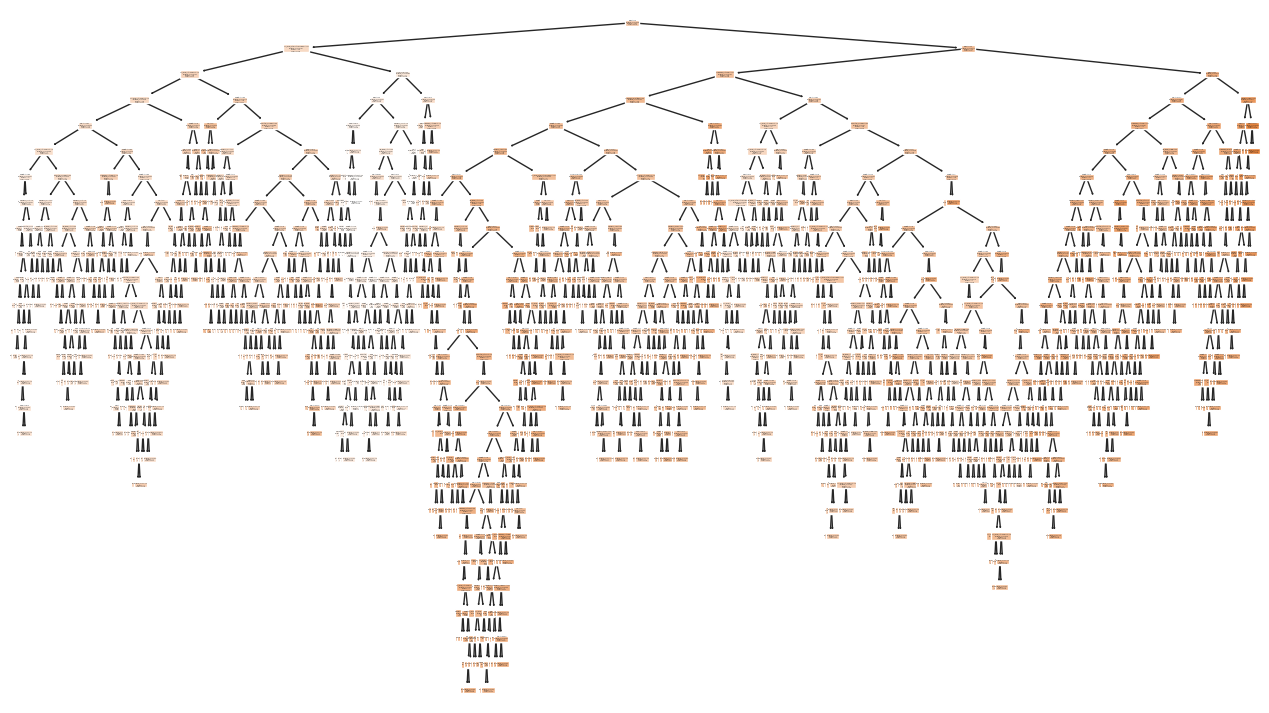

In [197]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(x_train, y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg, filled=True, feature_names=train_df.columns)

In [198]:
## using complexity prunning to esimate ccp pruning

path = reg.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas


In [199]:
ccp_alphas

array([0.00000000e+00, 2.31070808e-14, 2.01195920e-12, 1.25807529e-11,
       1.39531594e-11, 1.08480042e-10, 2.67878848e-10, 3.51734881e-10,
       4.90605638e-10, 6.24983018e-10, 1.12056497e-09, 2.23926040e-09,
       2.84423982e-09, 3.71892484e-09, 3.85160626e-09, 5.04614316e-09,
       5.05220332e-09, 5.17833289e-09, 5.49308604e-09, 6.03125075e-09,
       6.96464279e-09, 8.28418797e-09, 9.89351061e-09, 1.00972535e-08,
       1.04216632e-08, 1.05173310e-08, 1.07652182e-08, 1.09588782e-08,
       1.19756103e-08, 1.59461817e-08, 1.65402512e-08, 1.68618262e-08,
       1.85797675e-08, 2.02766171e-08, 2.23141668e-08, 2.41450016e-08,
       2.62688668e-08, 2.71423417e-08, 3.02336782e-08, 3.16824536e-08,
       3.29392626e-08, 3.32370434e-08, 3.33400765e-08, 3.36303069e-08,
       3.60396001e-08, 3.75954349e-08, 3.99921029e-08, 4.52310764e-08,
       4.57148123e-08, 4.59920157e-08, 5.20134184e-08, 5.22858162e-08,
       5.52706255e-08, 5.53230696e-08, 5.56017430e-08, 5.56551148e-08,
      

In [200]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    reg.fit(x_train, y_train)
    alphalist.append(reg)

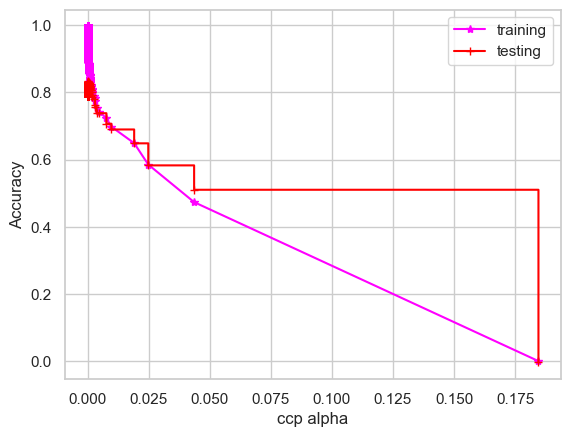

In [202]:
train_score =[reg.score(x_train, y_train) for reg in alphalist]
test_score = [reg.score(x_test, y_test) for reg in alphalist]

plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas, train_score, marker='*',
         label='training', color='magenta')
plt.plot(ccp_alphas, test_score, marker='+',
         label='testing', color='red', drawstyle='steps-post')
plt.legend()
plt.show()

The optimun ccp alpha is between clusters of 0.0025 to 0.0075

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.39\nsamples = 1107\nvalue = 14.015'),
 Text(0.25, 0.7, 'cpu_name_Other Intel Processor <= 0.5\nsquared_error = 0.191\nsamples = 370\nvalue = 13.409'),
 Text(0.125, 0.5, 'squared_error = 0.127\nsamples = 259\nvalue = 13.587'),
 Text(0.375, 0.5, 'squared_error = 0.094\nsamples = 111\nvalue = 12.992'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.213\nsamples = 737\nvalue = 14.32'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.157\nsamples = 540\nvalue = 14.165'),
 Text(0.5, 0.3, 'squared_error = 0.102\nsamples = 275\nvalue = 14.359'),
 Text(0.75, 0.3, 'PPI <= 114.881\nsquared_error = 0.134\nsamples = 265\nvalue = 13.963'),
 Text(0.625, 0.1, 'squared_error = 0.069\nsamples = 56\nvalue = 13.574'),
 Text(0.875, 0.1, 'squared_error = 0.1\nsamples = 209\nvalue = 14.068'),
 Text(0.875, 0.5, 'squared_error = 0.12\nsamples = 197\nvalue = 14.743')]

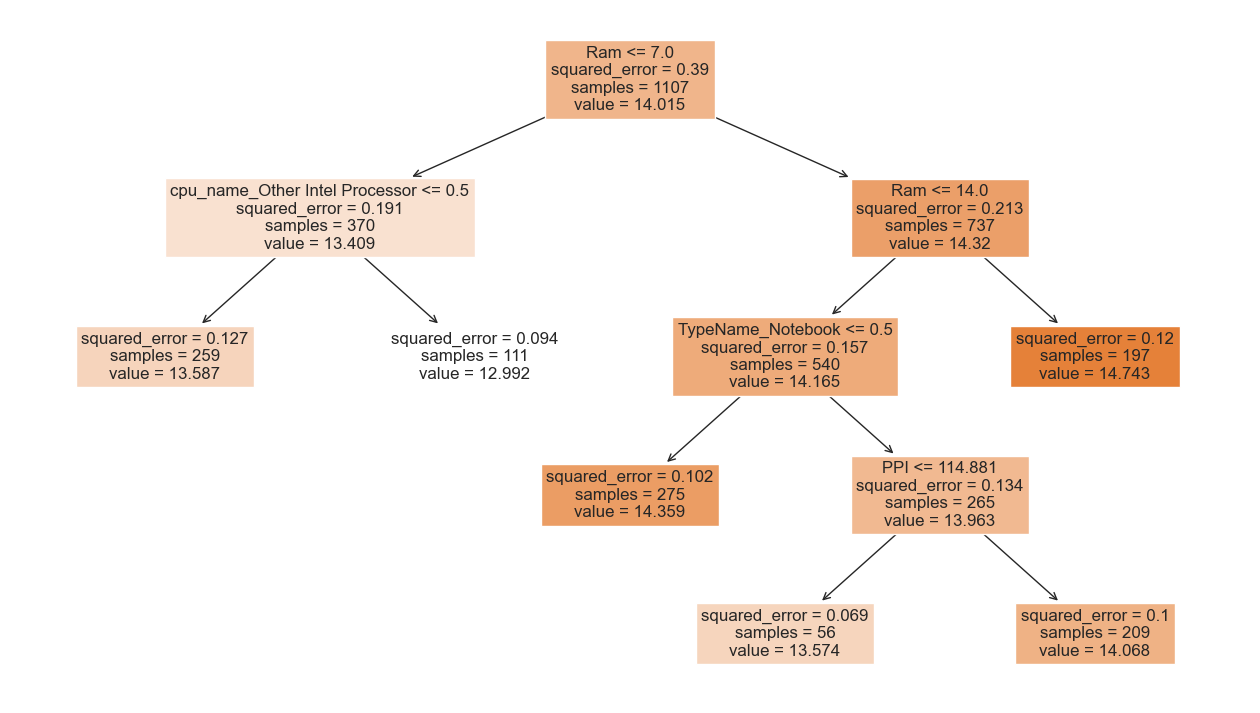

In [203]:
reg = DecisionTreeRegressor(random_state=0, ccp_alpha=0.0085)
reg.fit(x_train, y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg, filled=True, feature_names=train_df.columns)

In [208]:
## hyperparameter tunning of decision tree and random forest

params = {
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params': {
            'n_estimators': [int(x) for x in np.linspace(100, 1200, 10)],
            'criterion': ["mse", "mae"],
            'max_depth': [int(x) for x in np.linspace(1,30,5)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2,5,10,14],
            'min_samples_leaf': [2,5,10,14]
        }
    },
    
    'DecisionTree':{
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ["mse", "mae"],
            'max_depth': [int(x) for x in np.linspace(1,30,5)],
            'max_features': ['auto', 'sqrt', 'log2'],
            'ccp_alpha': [x for x in np.linspace(0.0025, 0.0125, 5)],
            'min_samples_split': [2,5,10,14],
            'min_samples_leaf': [2,5,10,14]
        }
    }
}

In [209]:
scores = []
for modelname, mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                             param_distributions=mp['params'], cv=5,
                             n_iter=10, scoring='neg_mean_squared_error', verbose=2)
    
    clf.fit(x_train, y_train)
    scores.append({
        'model_name': modelname,
        'best_score': clf.best_score_,
        'best_estimator': clf.best_estimator_,
    })
    


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.2s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=30, max_features=sqrt, min_samples_leaf=14, min_samples_split=5, n_estimators=222; total time=   1.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   6.6s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   6.6s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   6.7s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   7.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=1077; total time=   7.2s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=   2.8s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=   2.9s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=   2.8s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=   2.7s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=955; total time=   3.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=955; total time=   5.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=955; total time=   5.4s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=955; total time=   5.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=955; total time=   5.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=2, n_estimators=955; total time=   4.8s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1200; total time=   1.8s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1200; total time=   2.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1200; total time=   2.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1200; total time=   1.8s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=30, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=1200; total time=   1.7s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   3.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.9s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.9s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.9s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=   2.9s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=  11.3s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=  12.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=  12.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=  11.2s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=466; total time=  11.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=   6.6s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=   6.8s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=   6.8s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=   6.9s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=1077; total time=   6.7s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=466; total time=   2.3s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=466; total time=   2.3s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=466; total time=   2.3s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=466; total time=   2.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


[CV] END ccp_alpha=0.005, criterion=mae, max_depth=22, max_features=log2, min_samples_leaf=14, min_samples_split=5, n_estimators=466; total time=   2.1s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mse, max_depth=22, max_features=auto, min_samples_leaf=5, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0025, criterion=mae, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=14; total 

C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_

[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=8, max_features=auto, min_samples_leaf=10, min_samples_split=5; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features=log2, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=1, max_features

C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolut

[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=mae, max_depth=8, max_features=sqrt, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.0125, criterion=mse, max_depth=

C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` whi

[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=mae, max_depth=22, max_features=auto, min_samples_leaf=14, min_samples_split=2; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s


C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolut

[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mae, max_depth=15, max_features=auto, min_samples_leaf=14, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mse, max_depth=22, max_features=log2, min_samples_leaf=10, min_samples_split=14; total time=   0.0s
[CV] END ccp_alpha=0.005, criterion=mse, max_dep

C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolut

In [210]:
## convert the score into dataframe

score_df =pd.DataFrame(scores, columns=['model_name', 'best_score', 'best_estimator'])
score_df

,model_name,best_score,best_estimator
0,RandomForest,-0.074241,"(DecisionTreeRegressor(ccp_alpha=0.0025, crite..."
1,DecisionTree,-0.089005,"DecisionTreeRegressor(ccp_alpha=0.0025, criter..."


the best_score is the error the model got. a very low score means the prediction accuracy of the model is high

In [211]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.0742412095170814,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.0025, criterion='mae', max_depth=15,
                        max_features='sqrt', min_samples_leaf=5,
                        min_samples_split=5, n_estimators=466)},
 {'model_name': 'DecisionTree',
  'best_score': -0.08900456770231953,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.0025, criterion='mse', max_depth=22,
                        max_features='auto', min_samples_leaf=5,
                        min_samples_split=10)}]

In [214]:
## picking out the randomforest classifer object

ranFor = RandomForestRegressor(ccp_alpha=0.0025, criterion='mae', max_depth=15,
                        max_features='sqrt', min_samples_leaf=5,
                        min_samples_split=5, n_estimators=466)

ranFor.fit(x_train, y_train)
ypred= ranFor.predict(x_test)
print(metrics.r2_score(y_test, ypred))

C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.8451458663421952


In [215]:
# checking previous randomforest
prf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15
                              )

prf.fit(x_train, y_train)
pypred= prf.predict(x_test)
print(metrics.r2_score(y_test, pypred))

0.8842612561857565


#### Prediction on whole dataset

In [218]:
train_df

,Ram,Weight,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Workstation,cpu_name_Intel Core i3,cpu_name_Intel Core i5,cpu_name_Intel Core i7,cpu_name_Other Intel Processor,gpu_brand_ARM,gpu_brand_Intel,gpu_brand_Nvidia,OpSystem_Others,OpSystem_Windows
0,8,1.37,0,1,226.983005,0,128,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,8,1.34,0,0,127.677940,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,16,1.83,0,1,220.534624,0,512,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,1.37,0,1,226.983005,0,256,1,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [217]:
test_df

0       14.370313
1       13.971336
2       13.524490
3       15.009034
4       14.667659
          ...    
1298    13.628458
1299    14.482673
1300    12.603842
1301    13.808687
1302    13.080916
Name: Price, Length: 1303, dtype: float64

In [219]:
predicted = []

#convert train to np array
testtrain = np.array(train_df)
for i in range(len(testtrain)):
    predicted.append(ranFor.predict([testtrain[i]]))
    
predicted

C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor wa

[array([14.36942776]),
 array([14.15883934]),
 array([13.85057732]),
 array([14.66223921]),
 array([14.40262186]),
 array([13.36544335]),
 array([14.38970229]),
 array([14.15883934]),
 array([14.637488]),
 array([14.23772498]),
 array([13.43735349]),
 array([13.32017431]),
 array([14.60327351]),
 array([13.54215255]),
 array([14.33780852]),
 array([14.40262186]),
 array([14.12838372]),
 array([14.66223921]),
 array([13.59123623]),
 array([14.33276706]),
 array([12.98569049]),
 array([14.16922311]),
 array([13.29166424]),
 array([14.21834232]),
 array([14.37712976]),
 array([13.3636115]),
 array([14.15716481]),
 array([13.99774418]),
 array([14.44437268]),
 array([13.86144213]),
 array([13.07967878]),
 array([13.32018263]),
 array([13.48801615]),
 array([14.68224891]),
 array([14.15716481]),
 array([12.99586823]),
 array([13.25922567]),
 array([13.99185667]),
 array([13.62830594]),
 array([14.03144223]),
 array([13.31547209]),
 array([14.58147051]),
 array([13.61145004]),
 array([13.821

In [220]:
# because we transformed our price to variable to np.log 
# we need to retranform it using np.exp to get real result

answer = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [222]:
data['Predicted Price'] = np.array(answer)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,gpu_brand,OpSystem,Predicted Price
0,Apple,Ultrabook,8,1.370,1741597.000,0,1,226.983,Intel Core i5,0,128,Intel,Mac,1740055.841
1,Apple,Ultrabook,8,1.340,1168622.000,0,0,127.678,Intel Core i5,0,0,Intel,Mac,1409632.152
2,HP,Notebook,8,1.860,747500.000,0,0,141.212,Intel Core i5,0,256,Intel,Others,1035688.856
3,Apple,Ultrabook,16,1.830,3298685.000,0,1,220.535,Intel Core i7,0,512,AMD,Mac,2332005.558
4,Apple,Ultrabook,8,1.370,2344680.000,0,1,226.983,Intel Core i5,0,256,Intel,Mac,1798784.751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.800,829400.000,1,1,157.351,Intel Core i7,0,128,Intel,Windows,1162256.719
1299,Lenovo,2 in 1 Convertible,16,1.300,1948700.000,1,1,276.054,Intel Core i7,0,512,Intel,Windows,2391713.261
1300,Lenovo,Notebook,2,1.500,297700.000,0,0,111.935,Other Intel Processor,0,0,Intel,Windows,422914.413
1301,HP,Notebook,6,2.190,993200.000,0,0,100.455,Intel Core i7,1000,0,AMD,Windows,853605.040


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


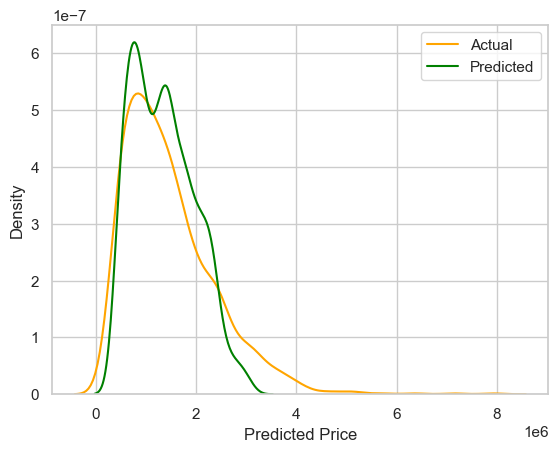

In [223]:
# lets plot to see how good the predicted values are

sns.distplot(data['Price'], hist=False, color='orange', label='Actual')
sns.distplot(data['Predicted Price'], hist=False, color='green', label='Predicted')
plt.legend()
plt.show()

This is not a good model and we would use the first ramdom forest model again to see what we get

In [238]:
# checking previous randomforest and tweaking it a little
prf = RandomForestRegressor(n_estimators=115,
                              random_state=2,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=14
                              )

prf.fit(x_train, y_train)
pypred= prf.predict(x_test)
print(metrics.r2_score(y_test, pypred))

0.8881571579263362


In [239]:
# use it to predict on the whole dataset

predicted = []

#convert train to np array
testtrain = np.array(train_df)
for i in range(len(testtrain)):
    predicted.append(prf.predict([testtrain[i]]))
    
predicted

C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Timileyin\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor wa

[array([14.37235983]),
 array([14.06026969]),
 array([13.70764468]),
 array([14.98779952]),
 array([14.50594829]),
 array([13.1287613]),
 array([14.6099663]),
 array([14.06026969]),
 array([14.60869498]),
 array([14.00257839]),
 array([13.3981344]),
 array([13.10985397]),
 array([14.93200867]),
 array([13.4545585]),
 array([14.38388423]),
 array([14.50594829]),
 array([13.94341564]),
 array([14.98779952]),
 array([13.50250974]),
 array([14.25138001]),
 array([12.65613595]),
 array([14.09368421]),
 array([12.91975414]),
 array([14.01042758]),
 array([13.93483134]),
 array([13.30332334]),
 array([14.09902943]),
 array([13.89026323]),
 array([14.25060049]),
 array([13.95965508]),
 array([12.79114042]),
 array([13.09997168]),
 array([13.37401241]),
 array([14.86055836]),
 array([14.09902943]),
 array([12.85016556]),
 array([13.14273825]),
 array([14.07357592]),
 array([13.55811222]),
 array([13.97174992]),
 array([13.18896873]),
 array([14.45513997]),
 array([13.52692144]),
 array([13.7197

In [240]:
# because we transformed our price to variable to np.log 
# we need to retranform it using np.exp to get real result

answer2 = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [243]:
data2 = data.copy()

data2['Predicted Price'] = np.array(answer2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

data2

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,cpu_name,HDD,SSD,gpu_brand,OpSystem,Predicted Price
0,Apple,Ultrabook,8,1.370,1741597.000,0,1,226.983,Intel Core i5,0,128,Intel,Mac,1745165.292
1,Apple,Ultrabook,8,1.340,1168622.000,0,0,127.678,Intel Core i5,0,0,Intel,Mac,1277313.615
2,HP,Notebook,8,1.860,747500.000,0,0,141.212,Intel Core i5,0,256,Intel,Others,897747.997
3,Apple,Ultrabook,16,1.830,3298685.000,0,1,220.535,Intel Core i7,0,512,AMD,Mac,3229376.095
4,Apple,Ultrabook,8,1.370,2344680.000,0,1,226.983,Intel Core i5,0,256,Intel,Mac,1994588.432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.800,829400.000,1,1,157.351,Intel Core i7,0,128,Intel,Windows,872298.384
1299,Lenovo,2 in 1 Convertible,16,1.300,1948700.000,1,1,276.054,Intel Core i7,0,512,Intel,Windows,2119631.207
1300,Lenovo,Notebook,2,1.500,297700.000,0,0,111.935,Other Intel Processor,0,0,Intel,Windows,321428.082
1301,HP,Notebook,6,2.190,993200.000,0,0,100.455,Intel Core i7,1000,0,AMD,Windows,954184.364


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


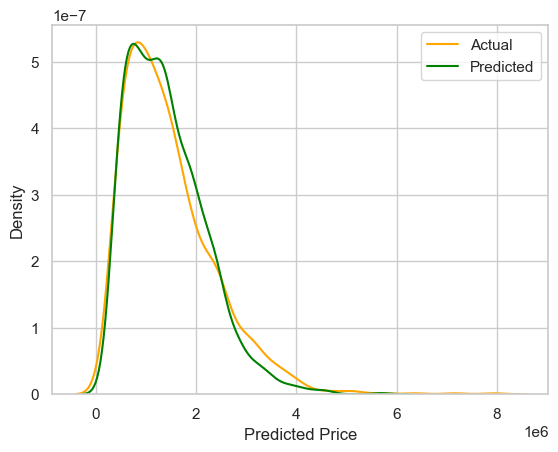

In [244]:
# lets plot to see how good the predicted values are

sns.distplot(data2['Price'], hist=False, color='orange', label='Actual')
sns.distplot(data2['Predicted Price'], hist=False, color='green', label='Predicted')
plt.legend()
plt.show()

In [245]:
## lets save this model

import pickle
file = open('laptoppricepredictorversion2.pkl', 'wb')
pickle.dump(prf, file)
file.close()

In [1]:
1 - 0.8881571579263362

0.1118428420736638

In [5]:
np.exp(13.4545585)

697012.4138599115